In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)

In [2]:
pwd

'c:\\Users\\acer\\Desktop'

In [3]:
data=pd.read_csv(r"c:\Users\acer\Desktop\FuelConsumption.csv")

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
X=data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y=data[['CO2EMISSIONS']]

In [6]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
Xtrain=Xtrain[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Ytrain=Ytrain.values.ravel()
Xtest=Xtest[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Ytest=Ytest.values.ravel()

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [9]:
rf_model=RandomForestRegressor(max_depth=3,n_estimators=100,random_state=10)
rf_model.fit(Xtrain,Ytrain)
yhat=rf_model.predict(Xtest)

print("MSE:",mean_squared_error(yhat,Ytest))
print("MAE:",mean_absolute_percentage_error(yhat,Ytest))
print("R2_Score:",r2_score(yhat,Ytest))
print("Training Accuracy")
print(rf_model.score(Xtrain,Ytrain))
print("Testing Accuracy")
rf_model.score(Xtest,Ytest)



MSE: 388.06688561725076
MAE: 0.04597053218720773
R2_Score: 0.897464077803414
Training Accuracy
0.9091205414074729
Testing Accuracy


0.9080733813866586

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

low=0
up= data.shape[0]
folds=KFold(n_splits=3)
fold=0
x,y=0,0
xt,yt=0,0

for train,test in folds.split(range(low,up)):
     
     x=X.iloc[train]
     y=Y.iloc[train]

     xt=X.iloc[test]
     yt=Y.iloc[test]

     model=LinearRegression()

     model.fit(X,Y)

     yhat=model.predict(xt.values)

     print("MAE:",mean_absolute_percentage_error(yhat,yt))
     print("MSE:",mean_squared_error(yhat,yt))

MAE: 0.06016928066918551
MSE: 601.8033825566647
MAE: 0.0748950714630325
MSE: 693.0116526644015
MAE: 0.05641392785044695
MSE: 341.6627830294862


Fold1
MAE: 0.0803944536236619
MSE: 854.9514558031822
Fold2
MAE: 0.09173451763419231
MSE: 1051.357539968007
Fold3
MAE: 0.09708772699832917
MSE: 1070.6902092071475
Fold4
MAE: 0.0994872674872146
MSE: 1013.7402761059449
Fold5
MAE: 0.08564078204459523
MSE: 740.7665529780116


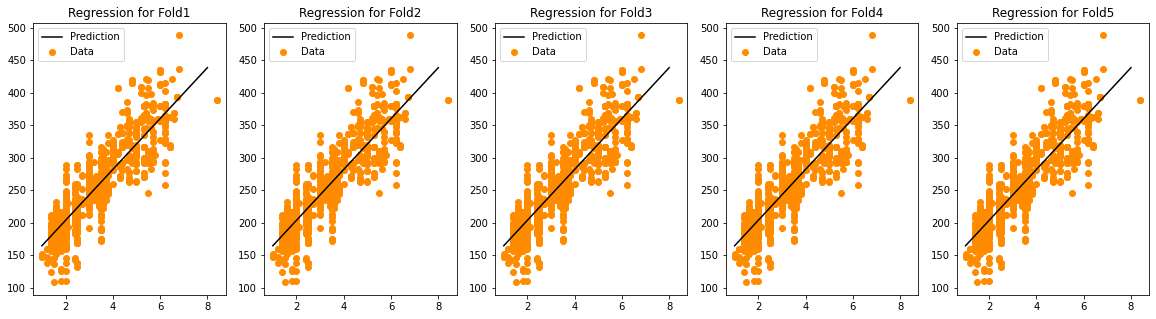

In [15]:
X=data[['ENGINESIZE']]
Y=data[['CO2EMISSIONS']]

line=np.linspace(1,8,1000).reshape(-1,1)

fig,axes=plt.subplots(1,5,figsize=(20,5))

low=0
up= data.shape[0]
folds=KFold(n_splits=5)
fold=0

for splits,ax in zip(folds.split(range(low,up)),axes):
     
    x=X.iloc[splits[0]]
    y=Y.iloc[splits[0]]

    xt=X.iloc[splits[1]]
    yt=Y.iloc[splits[1]]

    model=LinearRegression()

    model.fit(X,Y)

    yhat=model.predict(xt.values)
    fold+=1

    print(f"Fold{fold}")
    print("MAE:",mean_absolute_percentage_error(yhat,yt))
    print("MSE:",mean_squared_error(yhat,yt))

    ax.scatter(X.values,Y,c='darkorange',label='Data')
    ax.plot(line,model.predict(line),c='black',label='Prediction')
    ax.legend()
    ax.set_title(f'Regression for Fold{fold}')